In [23]:
import tensorflow as tf
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras


# For procedural markdown tables
from IPython.display import display, Markdown, clear_output



In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
# (train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28**2))
test_images = test_images.astype('float32') / 255

train_labels_one_hot = keras.utils.to_categorical(train_labels)
test_labels_one_hot = keras.utils.to_categorical(test_labels)

In [3]:
print(train_labels[0])
print()
print(tf.argmax(train_labels_one_hot[0]).numpy())

5

5


In [4]:
model = keras.models.Sequential()
model.add(keras.Input((28*28,)))
model.add(keras.layers.Dense(12, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels_one_hot)
print(f"loss: {test_loss}, acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.1061 - loss: 2.3312
loss: 2.331155776977539, acc: 0.10610000044107437


6-11% accuracy.

I guess the baseline idea comes later. For a baseline we would (if it were balanced) randomly guess. If it were unbalanced we would guess the most common feature.

In [6]:
model.fit(
    train_images,
    train_labels_one_hot,
    epochs=5,
    batch_size=128
)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step - accuracy: 0.8002 - loss: 0.7301
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.9002 - loss: 0.3510
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.9178 - loss: 0.2947
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.9235 - loss: 0.2703
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.9287 - loss: 0.2556


In [7]:
loss, acc = model.evaluate(test_images, test_labels_one_hot)
print(f"loss: {loss}, acc: {acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.9261 - loss: 0.2529
loss: 0.2528761923313141, acc: 0.9261000156402588


### Research

Network training and test accuracy: 
- training was very fast.  network goes from 7% to 85% accuracy. Looks like loss continuing to go down after 5 epochs. Accuracy goes to 75% after one epoch.

Next we train on 20 epochs...

In [8]:
model.fit(
    train_images,
    train_labels_one_hot,
    epochs=5,
    batch_size=128
)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.9325 - loss: 0.2444
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.9343 - loss: 0.2353
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.9361 - loss: 0.2285
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.9377 - loss: 0.2227
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.9394 - loss: 0.2179


Loss goes down to 35, accuracy up to 87% in training.

In [9]:
loss, acc = model.evaluate(test_images, test_labels_one_hot)
print(f"loss: {loss}, acc: {acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.9346 - loss: 0.2260
loss: 0.22603921592235565, acc: 0.9345999956130981


Accuracy at 85% in evaluation.

In [10]:
def test_trainer(units, epochs):
    model = keras.models.Sequential()
    model.add(keras.Input((28*28,)))
    model.add(keras.layers.Dense(units, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    history = model.fit(
        train_images,
        train_labels_one_hot,
        epochs=epochs,
        batch_size=128,
        verbose=0
    )
    train_acc = history.history['accuracy'][-1]
    loss, acc = model.evaluate(test_images, test_labels_one_hot, verbose=0)
    return f"|{units} | {epochs} | {train_acc} |{loss} |{acc}|"


First try to find a network with 100% acc

In [30]:

unit_counts = [16, 32, 128, 256, 512]
epoch_counts = [20]

info = []

total_tests = len(unit_counts) * len(epoch_counts)
i = 0

for units in unit_counts:
    for epochs in epoch_counts:
        i += 1
        info.append(test_trainer(units, epochs))
        print(f"\r[{i}/{total_tests}]", end="")


header = "units | epochs | train_acc | test_loss | test_acc\n---|---|---|---|---"
display(Markdown(f"{header}\n{"\n".join(info)}"))


[5/5]

units | epochs | train_acc | test_loss | test_acc
---|---|---|---|---
|16 | 20 | 0.9565833210945129 |0.17986604571342468 |0.9467999935150146|
|32 | 20 | 0.9807833433151245 |0.11447636783123016 |0.9689000248908997|
|128 | 20 | 0.9988666772842407 |0.07628580927848816 |0.9800000190734863|
|256 | 20 | 0.9987333416938782 |0.09198155254125595 |0.9781000018119812|
|512 | 20 | 0.9996500015258789 |0.07078933715820312 |0.9822999835014343|

I never reach 100% exactly, but 99.88 rounds to 100...

Different runs and random initializations lead to slightly different results for accuracy.

Loss with 512 is significantly lower than with 256 though.

In [19]:
def experiment(units, epochs, optimizer):
    model = keras.models.Sequential()
    model.add(keras.Input((28*28,)))
    model.add(keras.layers.Dense(units, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    history = model.fit(
        train_images,
        train_labels_one_hot,
        epochs=epochs,
        batch_size=128,
        verbose=0
    )
    train_acc = history.history['accuracy'][-1]
    loss, acc = model.evaluate(test_images, test_labels_one_hot, verbose=0)
    momentum = optimizer.momentum if optimizer.name == 'SGD' else 'n/a'
    return f"|{optimizer.name}| {optimizer.learning_rate.numpy()}| {momentum} |{units} | {epochs} | {train_acc} |{loss} |{acc}|"

In [29]:
optimizers = [
    keras.optimizers.Adam(learning_rate = 0.001),
    keras.optimizers.Adam(learning_rate = 0.002),
    keras.optimizers.Adam(learning_rate = 0.003),
    keras.optimizers.Adam(learning_rate = 0.005),
    keras.optimizers.Adam(learning_rate = 0.01),
    keras.optimizers.SGD(learning_rate =0.01, momentum=0.9999),
    keras.optimizers.SGD(learning_rate =0.01, momentum=0.999),
    keras.optimizers.SGD(learning_rate =0.01, momentum=0.99),
    keras.optimizers.SGD(learning_rate =0.01, momentum=0.95),
    keras.optimizers.SGD(learning_rate =0.01, momentum=0.9),
    keras.optimizers.SGD(learning_rate =0.01, momentum=0.5),
    keras.optimizers.SGD(learning_rate =0.01, momentum=0.1),
]

unit_counts = [128]
epoch_counts = [5]

info = []

total_tests = len(unit_counts) * len(epoch_counts)
i = 0

header = "|optimizer| learning rate | momentum | units |epochs | train_acc | test_loss | test_acc\n---|---|---|---|---|---|---|---"

for units in unit_counts:
    for epochs in epoch_counts:
        for optimizer in optimizers:
            i += 1
            info.append(experiment(units, epochs, optimizer))
            clear_output(wait=True)
            display(Markdown(f"{header}\n{"\n".join(info)}"))
        # print(f"\r[{i}/{total_tests}]", end="")




|optimizer| learning rate | momentum | units |epochs | train_acc | test_loss | test_acc
---|---|---|---|---|---|---|---
|adam| 0.0010000000474974513| n/a |128 | 5 | 0.979116678237915 |0.08794303983449936 |0.9729999899864197|
|adam| 0.0020000000949949026| n/a |128 | 5 | 0.9850000143051147 |0.09351690113544464 |0.9700000286102295|
|adam| 0.003000000026077032| n/a |128 | 5 | 0.9861166477203369 |0.07507789134979248 |0.9761999845504761|
|adam| 0.004999999888241291| n/a |128 | 5 | 0.9854999780654907 |0.08923439681529999 |0.9761999845504761|
|adam| 0.009999999776482582| n/a |128 | 5 | 0.978600025177002 |0.12481722235679626 |0.9700999855995178|
|SGD| 0.009999999776482582| 0.9999 |128 | 5 | 0.706933319568634 |1.4457110166549683 |0.6507999897003174|
|SGD| 0.009999999776482582| 0.999 |128 | 5 | 0.8931666612625122 |0.6051012873649597 |0.864300012588501|
|SGD| 0.009999999776482582| 0.99 |128 | 5 | 0.9836999773979187 |0.08109615743160248 |0.9753000140190125|
|SGD| 0.009999999776482582| 0.95 |128 | 5 | 0.9700166583061218 |0.10697904229164124 |0.9674000144004822|
|SGD| 0.009999999776482582| 0.9 |128 | 5 | 0.9573500156402588 |0.1420738250017166 |0.9577000141143799|
|SGD| 0.009999999776482582| 0.5 |128 | 5 | 0.9168000221252441 |0.2735980451107025 |0.9232000112533569|
|SGD| 0.009999999776482582| 0.1 |128 | 5 | 0.9025499820709229 |0.32034894824028015 |0.9103999733924866|

In this small test, SGD does seem to approach the performance of Adam, if momentum is .99.

The best performing Adam, with 0.003 lr  training gets 98.6% accuracy, while the best training with SGD+momentum with momentum 0.99 gets 98.3% accuracy.

I would expect the gap with Adam to widen as we add more layers?

## Using the model

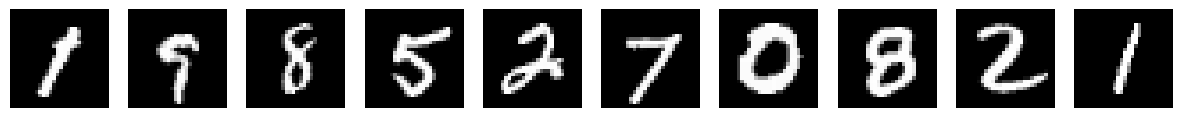

In [75]:
# Show a few images from the training set

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i in range(10):
    axes[i].imshow(train_images[np.random.randint(len(train_images))].reshape(28, 28), cmap='gray')
    axes[i].axis('off')
plt.show()

In [77]:
model = keras.models.Sequential()
model.add(keras.Input((28*28,)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    train_images,
    train_labels_one_hot,
    epochs=5,
    batch_size=128,
)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9019 - loss: 0.3581
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9535 - loss: 0.1630
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9660 - loss: 0.1162
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9737 - loss: 0.0900
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9790 - loss: 0.0728


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
guess: 7


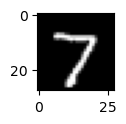

In [95]:
# Predict
image = test_images[0].reshape((1,784))
pred = model.predict(image)
c = tf.argmax(pred[0])

plt.figure(figsize=(1, 1))
plt.imshow(image.reshape((28, 28)), cmap='gray')
print(f"guess: {c}")


guess: 2


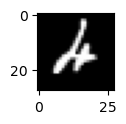

In [101]:
# find misclassifications

for i in range(len(test_images)):
    input_image = test_images[i].reshape(1, 784)
    guess = tf.argmax(model.predict(input_image, verbose=0)[0])
    correct = guess == test_labels[i]
    if not correct:
        plt.figure(figsize=(1, 1))
        plt.imshow(test_images[i].reshape((28, 28)), cmap='gray')
        print(f"guess: {guess}")
        break

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step


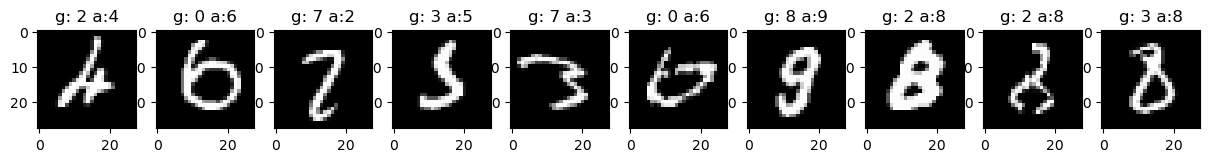

In [ ]:
# Vectorized
preds = tf.argmax(model.predict(test_images), axis=1)
wrong = preds != test_labels
indices = tf.where(wrong)[:, 0]

fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for j in range(10):
    i = indices[j].numpy()
    axes[j].imshow(test_images[i].reshape(28, 28), cmap='gray')
    axes[j].set_title(f"g: {preds[i].numpy()} a:{test_labels[i]}")
    axes[j].axis('off')
plt.show()



# Saving

In [114]:
model.save("2026-02-06-mnist.keras")

reloaded = keras.models.load_model('2026-02-06-mnist.keras')
pred = reloaded.predict(train_images[0].reshape(1,784))[0]
tf.argmax(pred).numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


np.int64(5)